#Import Library and Data

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Forecast-Data.csv', header=None)
df.columns = ['date', 'cost']

In [33]:
df

,date,cost
0,2022-01-01,19209356
1,2022-02-01,18900447
2,2022-03-01,23981660
3,2022-04-01,21429391
4,2022-05-01,16398709
5,2022-06-01,26425150
6,2022-07-01,20968481
7,2022-08-01,21845345
8,2022-09-01,28388277
9,2022-10-01,18731270


In [34]:
pip install tbats

In [35]:
# from tbats import BATS, TBATS

# from tbats import TBATS
# import numpy as np
# # required on windows for multi-processing,
# # see https://docs.python.org/2/library/multiprocessing.html#windows
# if __name__ == '__main__':
#     np.random.seed(2342)
#     t = np.array(range(0, 160))
#     y = 5 * np.sin(t * 2 * np.pi / 7) + 2 * np.cos(t * 2 * np.pi / 30.5) + \
#         ((t / 20) ** 1.5 + np.random.normal(size=160) * t / 50) + 10

#     # Create estimator
#     estimator = TBATS(seasonal_periods=[14, 30.5])

#     # Fit model
#     fitted_model = estimator.fit(y)

#     # Forecast 14 steps ahead
#     y_forecasted = fitted_model.forecast(steps=14)

#     # Summarize fitted model
#     print(fitted_model.summary())

In [36]:
# # Time series analysis
# print(fitted_model.y_hat) # in sample prediction
# print(fitted_model.resid) # in sample residuals
# print(fitted_model.aic)
# # Reading model parameters
# print(fitted_model.params.alpha)
# print(fitted_model.params.beta)
# print(fitted_model.params.x0)
# print(fitted_model.params.components.use_box_cox)
# print(fitted_model.params.components.seasonal_harmonics)

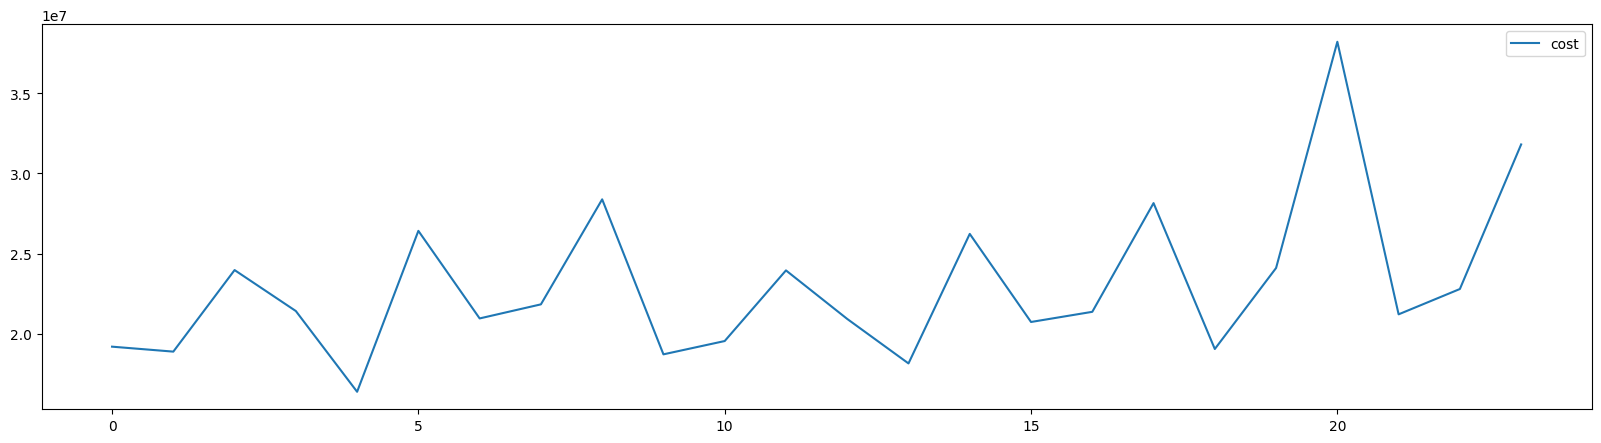

In [37]:
df['cost'].plot(figsize = (20, 5), legend = True);

In [38]:
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# # Separate the training data and the actual values for the last 3 months
# train_df = df[:-3]
# actual_df = df[-3:]

# # Fit the TBATS model using the training data
# estimator = TBATS(seasonal_periods=[12])  # Adjust seasonal_periods based on your data
# model = estimator.fit(train_df['cost'])

# # Forecast the next 3 months
# forecasted_values, confidence_intervals = model.forecast(steps=3, confidence_level=0.95)

# forecasted_values = forecasted_values.round()

# # Create a DataFrame for the forecasted values
# forecasted_df = pd.DataFrame({
#     'date': actual_df.index,
#     'forecasted_cost': forecasted_values
# })

# # Combine the actual and forecasted values into one DataFrame
# comparison_df = actual_df.copy()
# comparison_df['forecasted_cost'] = forecasted_df['forecasted_cost'].values

# print("Actual vs Forecasted Values for the last 3 months:")
# print(comparison_df)

In [39]:
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# # Fit the TBATS model using the training data
# estimator = TBATS(seasonal_periods=[12])  # Adjust seasonal_periods based on your data
# model_fit = estimator.fit(df['cost'])
# print(model_fit.summary())

In [40]:
# predictions, confidence_intervals = model_fit.forecast(steps=1, confidence_level=0.95)
# print(predictions)

In [41]:
import pandas as pd
from tbats import TBATS

# Ensure your date column is datetime and set as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create a TBATS estimator
estimator = TBATS(seasonal_periods=[6])  # Adjust seasonal_periods based on your data (6)

# Initialize lists to store predictions and confidence intervals
start = 6 # (6)
predictions_list = [np.nan] * start
confidence_intervals_list = []


# Iteratively fit the model and forecast
for i in range(start, len(df)):
    subset = df['cost'].iloc[:i]
    model_fit = estimator.fit(subset)
    prediction, confidence_interval = model_fit.forecast(steps=1, confidence_level=0.95) # 0.95

    # Store the prediction and confidence interval
    predictions_list.append(prediction[0])
    # confidence_intervals_list.append(confidence_interval[0])

# Convert predictions and confidence intervals to a DataFrame for better visualization
results = pd.DataFrame({
    'Prediction': predictions_list
    # 'Lower_CI': [ci[0] for ci in confidence_intervals_list],
    # 'Upper_CI': [ci[1] for ci in confidence_intervals_list]
})

# Display the results
print(results)

      Prediction
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6   3.353272e+07
7   1.774640e+07
8   2.815374e+07
9   2.316054e+07
10  1.732380e+07
11  2.786987e+07
12  2.021821e+07
13  2.005964e+07
14  2.614220e+07
15  1.989484e+07
16  1.796051e+07
17  2.513997e+07
18  2.025908e+07
19  1.933767e+07
20  2.789276e+07
21  2.315866e+07
22  2.065641e+07
23  2.918882e+07


In [42]:
results = results.round()
results

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,33532717.0
7,17746404.0
8,28153745.0
9,23160539.0


In [43]:
results['Prediction']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     33532717.0
7     17746404.0
8     28153745.0
9     23160539.0
10    17323800.0
11    27869872.0
12    20218205.0
13    20059644.0
14    26142201.0
15    19894842.0
16    17960511.0
17    25139973.0
18    20259079.0
19    19337666.0
20    27892761.0
21    23158661.0
22    20656414.0
23    29188815.0
Name: Prediction, dtype: float64

In [44]:
prediction_list = results['Prediction'].tolist()

In [45]:
df['prediction'] = prediction_list

In [46]:
df

,cost,prediction
date,,
2022-01-01,19209356,NaN
2022-02-01,18900447,NaN
2022-03-01,23981660,NaN
2022-04-01,21429391,NaN
2022-05-01,16398709,NaN
2022-06-01,26425150,NaN
2022-07-01,20968481,33532717.0
2022-08-01,21845345,17746404.0
2022-09-01,28388277,28153745.0


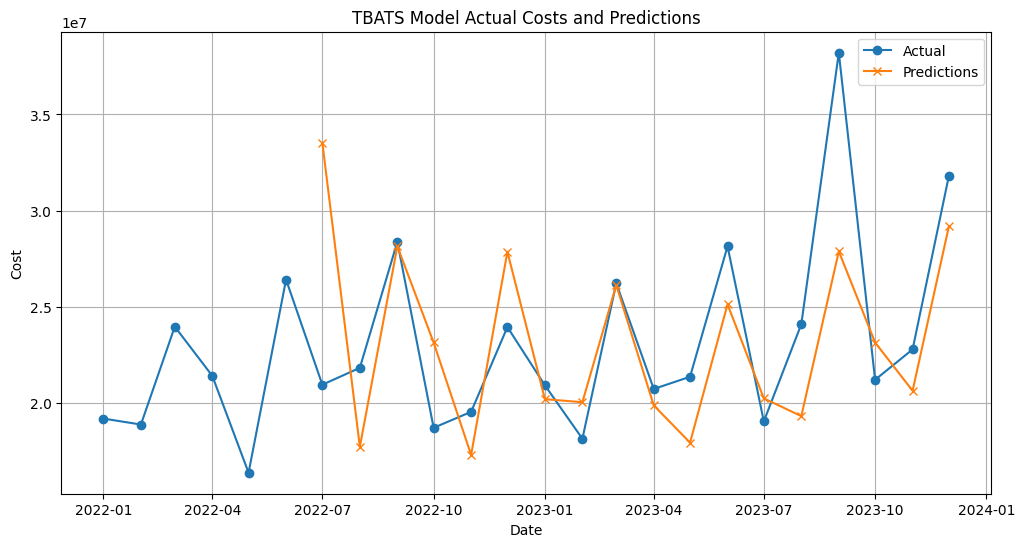

In [47]:
# Plot the actual cost and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cost'], label='Actual', marker='o')
plt.plot(df.index, df['prediction'], label='Predictions', marker='x')

plt.title('TBATS Model Actual Costs and Predictions')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

# Calculate MSE ignoring NaN values
valid_mask = ~df['prediction'].isna()
mse = mean_squared_error(df['cost'][valid_mask], df['prediction'][valid_mask])
print(f'Mean Squared Error: {mse:.2e}')

Mean Squared Error: 2.14e+13


In [49]:
model_fit = estimator.fit(df['cost'])
future_prediction, confidence_interval = model_fit.forecast(steps=3, confidence_level=0.95)

print(future_prediction)

[22732835.57753078 23304270.39170628 32446984.11338881]


In [ ]:
future_prediction = future_prediction.round()
print(future_prediction)

In [ ]:
import pandas as pd

# สร้าง dataframe ที่มี column 'date'
future_df = pd.DataFrame({'date': pd.date_range(start='2024-01-01', periods=len(future_prediction), freq='MS')})

# เพิ่ม column 'prediction' โดยใส่ค่าจาก future_prediction
future_df['prediction'] = future_prediction

# สร้าง column อื่นๆ และใส่ค่า nan
for column in future_df.columns:
    if column != 'date' and column != 'prediction':
        future_df[column] = None

print(future_df)

In [ ]:
concatenated_df = pd.concat([df, future_df], ignore_index=True, sort=False)

concatenated_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(concatenated_df.index, concatenated_df['cost'], label='Actual', marker='o')
plt.plot(concatenated_df.index, concatenated_df['prediction'], label='Predictions', marker='x')

plt.title('TBATS Model Actual Costs and Predictions')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()